In [5]:
# 2장  시작하기 전에: 신경망의 수학적 구성 요소.

# 2.1 신경망과의 첫 만남.

# 머신 러닝에서 분류 문제의 범주를 클래스 라고 합니다.
# 데이터 포인트는 샘플이라고 합니다. 
# 특정 샘플의 클래스는 레이블 이라고 합니다.

# 신경망의 핵슴 구성 요소는 일종의 데이터 처리 필터라고 생각할 수 있는 층(layer).
# 층은 주어진 문제에 더 의미 있는 표현을 입력된 데이터로부터 추출합니다.

# loss function(손실 함수) : 훈련 데이터에서 신경망의 성능을 측정하는 방법 -> 네트워크가 옳은 방향으로 학습되게 도와줌.
# optimizer(옵티마이저) : 입력된 데이터와 손실 함수 기반 네트워크를 업데이트
# 훈련과 테스트 과정을 모니터링할 지표 : 여기에선 정확도만 고려.

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 신경망 구조.
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# 컴파일 단계.
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# 이미지 데이터 준비하기.
# 이 데이터를 0 과 1 사이의 값을 가지는 float32 타입의 (60000, 28 * 28) 크기의 배열로 바꿉니다. 
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

2.2 신경망을 위한 데이터 표현.

모든 머신 러닝 시스템은 텐서를 기본 데이터 구조로 사용합니다.

스칼라 0D 텐서 - 하나의 숫자만 담고 있는 텐서를 스칼라 라고 부릅니다. 

벡터 1D 텐서 - 딱 하나의 축을 가집니다. 

행렬 2D 텐서 - 행렬에는 2 개의 축이 있습니다. 

3D 텐서와 고차원 텐서 - 

In [7]:
# 데이터 타입(넘파이에서 dtype에 저장됩니다.) 텐서에 포함된 데이터의 타입.
# float32, uint8, float64 등이 될 수 있음. 

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
print(train_images.ndim) # train_images 배열의 ndim 속성으로 축의 개수를 확인. 
print(train_images.shape) # 배열의 크기. 
print(train_images.dtype) # 데이터 타입.  
# 즉 이 배열은 8 bit 정수형 3D 텐서입니다. 좀 더 정확하게는 28 x 28 크기의 저수 행렬 6 만 개가 가지고 있는 배열 입니다. 
# 각 행렬은 하나의 흑백 이미지이고, 각 원소는 0에서 255 사이의 값을 가집니다. 

3
(60000, 28, 28)
uint8


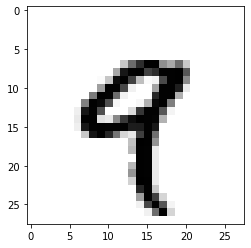

In [11]:
# 다섯 번쨰 이미지 출력하기.
digit = train_images[4] 

import matplotlib.pyplot as plt 

plt.imshow(digit, cmap=plt.cm.binary)
plt.show() 

In [13]:
# 넘파이로 텐서 조작하기.
# 배열에 있는 특정 원소들을 선택하는 것을 슬라이싱(slicing) 이라고 합니다. 
# 예로 11 번쨰에서 101번쨰까지 숫자를 선택 후 (90, 28, 28) 크기의 배열을 만듭니다.

my_slice = train_images[10:100]
print(my_slice.shape)

# 각 배열의 축을 따라 어떤 인덱스 사이도 선택 가능. 14 x 14 픽셀 선택해보자.
my_slice = train_images[:, 14:, 14:]

# 음수 인덱스도 사용 가능. 14 x 14 픽셀 조각을 이미지에서 잘라 내려보면?
my_slice = train_images[:, 7:-7, 7:-7]

(90, 28, 28)


텐서의 실제 사례.

벡터 데이터 : (sample, features) 크기의 2D 텐서

시계열 데이터 또는 시퀸스 데이터 : (samples, timesteps, features) 크기의 3D 텐서.

이미지 : (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서.

동영상 : (samples, frames, width, channels) 또는 (samples, frames, channels, height, width) zmrldml 5D 텐서 .

벡터 데이터.

여기서 첫 번쨰 축은 샘플 축이고, 두 번쨰 축은 특성 축(feature axis) 입니다.

사람의 나이, 우편 번호, 소득으로 구성된 인구 통계 데이터는 각 사람은 3개의 값을 가진 벡터로 구성되고 10만 명이 포함된 전체 데이터셋은 
(100000, 3) 크기의 텐서로 저장될 수 있습니다.

(공통 단어 2만 개로 만든 사전) 각 단어가 등장한 횟수로 표현된 텍스트 문서 데이터 셋, 각 문서는 2만 개의 원소(사전에 있는 단어마다 하나의 원소에 대응합니다)를 가진 벡터로 인코딩될 수 있습니다.

500개의 문서로 이루어진 전체 데이터셋은 (500, 20000) 크기의 텐서로 저장됩니다. 



시계열 데이터 또는 시퀸스 데이터 

데이터에서 시간이 (도는 연속된 숫자가) 중요할 떄는 시간 축을 포함, 3D 텐서로 저장됩니다.
각 샘플은 벡터(2D 텐서)의 시퀸스로 인코딩되므로 배치 데이터는 3D 텐서로 인코딩될 것 입니다.

이미지 데이터 

높이, 너비, 커럴 채널의 3차원으로 이루어집니다. 
(MNIST 숫자처럼) 흑백 이미지는 하나의 컬러 채널만을 가지고 있어 2D 텐서로 저장될 수 있지만 관례상 이미지 텐서는 항상 3D로 저장됩니다.
흑백 이미지의 경우 컬러 채널의 차원 크기는 1 입니다. 256 x 256 크기의 흑백 이미지에 대한 128개의 배치는 (128, 256, 256, 1) 크기의 텐서로 저장될 수 있습니다.

컬러 이미지에 대한 128 개의 배치라면 (128, 256, 256, 3) 크기의 텐서로 저장될 수 있습니다.

tensorflow 형식에서는 (samples, height, width, color_depth) 컬러 채널의 깊이를 끝에 놓습니다. 


비디오 데이터 

생략 

신경망의 톱니바퀴 : 텐서 연산

컴퓨터 이진수 AND OR 처럼 신경망에서도 데이터 텐서에 적용하는 몇 종류의 텐서 연산으로 나타낼 수 있습니다.
예를 들어 텐서 덧셈이나 텐서 곱셈 등 입니다.

첫 번쨰 예제에서는 Dense 층을 쌓아서 신경망을 만들었습니다. 

keras.layers.Dense(512, activation='relu') 

이 층은 2D 텐서를 입력으로 받고 입력 텐서의 새로운 표현인 또 다른 2D 텐서를 반환하는 함수처럼 해석 할 수 있습니다.
W는 2D 텐서고, b는 벡터 입니다. 둘 모두 층의 속성입니다.

output = relu(dot(W, input) + b) 

여기에선 3 개의 텐서 연산이 있음.  입력 텐서와 텐서 W 사이의 점곱(dot), 점곱의 결과인 2D 텐서와 벡터 b 사이의 덧셈(+),
마지막으로 relu(렐루) 연산입니다 relu(x)는 max(x, 0)입니다.

원소별 연산 

relu 함수와 덧셈은 원소별 연산 입니다.

In [14]:
def naive_relu(x):
    assert len(x.shape) == 2 # x는 2D 넘파이 배열입니다.
    
    x = x.copy() # 입력 텐서 자체를 바꾸지 않도록 복사합니다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
            return x 

덧셈도 동일합니다. 

In [15]:
def naive_add(x, y):
    assert len(x.shape) == 2 # x와 y는 2D 넘파이 배열입니다.
    assert x.shape == y.shape 
    
    x = x.copy() # 입력 텐서 자체를 바꾸지 않도록 복사합니다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
            return x 

같은 원리로 원소별 곱셈, 뺼셈 등을 할 수 있습니다

브로드캐스팅

작은 텐서가 큰 텐서의 크기에 맞추어 브로드캐스팅 됩니다.  

1. 큰 텐서의 ndim에 맞도록 작은 텐서에 축이 추가 됩니다.
2. 작은 텐서가 새 축을 따라 큰 텐서의 크기에 맞도록 반복됩니다. 

예를 들어 x의 크기는 (32, 10) 이고, y의 크기는 (10,) 가정. 
먼저 y에 비어 있는 첫 번쨰 축은 추가하여 크기를 (1, 10) 으로 만듭니다.

그리고 y를 이 축에 32번 반복하여 텐서 Y의 크기는 (32, 10)이 됩니다. 
여기에서 Y[i, :] == y for i in range(0, 32) 입니다. 
이제 X와 Y의 크기가 같으므로 더할 수 있습니다. 

구현 입장에서는 새로운 텐서가 만들어지면 매우 비효율적이므로 어떤 2D 텐서도 만들어지지 않습니다. 

그냥 기억만 해놓자. 

In [17]:
def add(x, y):
    assert len(x.shape) == 2 # x 2D 넘파이 배열.
    assert len(y.shape) == 1 # Y 넘파이 벡터. 
    assert x.shape[1] == y.shape[0]
    
    x = x.copy() # 입력 텐서 자체를 바꾸지 않도록 복사합니다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
            return x

텐서 점곱 

텐서 곱셈이라고 불리는 점곱 연산은 가장 널리 사용되고 유용한 텐서 연산입니다.

넘파이,케라스, 씨아노, 텐서플로에서 원소별 곱셈은 * 연산자를 사용합니다. 

텐서플로에서는 dot 연산자가 다르지만 넘파이와 케라스는 점곱 연산에 dot 연산자를 사용합니다.

벡터 x와 y의 점곱은 다음과 같이 계산합니다.

In [21]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
        return z

행렬 x와 벡터 y사이에서도 점곱이 가능합니다. 

In [22]:
import numpy as np 

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2 # x 는 넘파이 행렬.
    assert len(y.shape) == 1 # y 는 넘파이 벡터.
    assert x.shape[1] == y.shape[0] # x의 두 번쨰 차원과 y의 첫 번쨰 차원이 같아야 합니다. 
    
    z = np.zeros(x.shape[0]) # 이 연산은 x의 행과 같은 크기의 0이 채워진 벡터를 만듭니다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
            return z 

자주 쓰이는 텐서 크기 변환의 전치(transposition)입니다.  전치는 행과 열을 바꾸는 것을 의미합니다. 

In [23]:
x = np.zeros((300, 20))
x = np.transpose(x) 
print(x.shape) 

(20, 300)


요약 

학습은 훈련 데이터 샘플과 그에 상응하는 타깃이 주어졌을 떄 손실 함수를 최소화하는 모델 파라미터의 조합을 찾는 것을 의미합니다.

데아터 샘플과 타깃의 배치를 랜덤하게 뽑고 이 배치에서 손실에 대한 파라미터의 그래디언트를 계산함으로써 학습이 진행됩니다.
네트워크의 파라미터는 그래디언트의 반대 방향으로 조금씩(학습률의 의해 정의된 크기만큼) 움직입니다. 

전체 학습 과정은 신경망이 미분 가능한 텐서 연산으로 연결되어 있기 떄문에 가능합니다.